In [30]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [31]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [32]:
S_sentinel_bands_forest = list(getFilesNew("/tmp/shared/2d_dataset2/forest"))

In [33]:
S_sentinel_bands_other = list(getFilesNew("/tmp/shared/2d_dataset2/other"))

In [34]:
S_sentinel_bands_water = list(getFilesNew("/tmp/shared/2d_dataset2/water"))

In [35]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                arr = f.read(1)
                arr = arr[0:96,0:96]
                s.append(arr)
        if len(s) == 12:
            l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [36]:
forest_st = getFilesArrayNew(S_sentinel_bands_forest);

In [37]:
other_st = getFilesArrayNew(S_sentinel_bands_other);

In [38]:
water_st = getFilesArrayNew(S_sentinel_bands_water);

In [39]:
other_st2 = np.moveaxis(other_st, 1, -1)

In [40]:
water_st2 = np.moveaxis(water_st, 1, -1)

In [41]:
forest_st2 = np.moveaxis(forest_st, 1, -1)

In [42]:
other_st3 = other_st2.reshape(-1, 32,32,12)

In [43]:
water_st3 = water_st2.reshape(-1, 32,32,12)

In [44]:
forest_st3 = forest_st2.reshape(-1, 32,32,12)

In [45]:
x_data = np.append(other_st3, water_st3,axis=0)
x_data = np.append(x_data, forest_st3, axis=0)
x_data.shape

(4311, 32, 32, 12)

In [46]:
y_other = np.full((other_st3.shape[0],other_st3.shape[1],other_st3.shape[2]),1)
y_water = np.full((water_st3.shape[0],water_st3.shape[1],water_st3.shape[2]),2)
y_forest = np.full((forest_st3.shape[0],forest_st3.shape[1],forest_st3.shape[2]),3)

In [47]:
y_data = np.append(y_other, y_water,axis=0)
y_data = np.append(y_data, y_forest, axis=0)

In [48]:
y_data.shape

(4311, 32, 32)

In [26]:
!pip install protobuf==3.20.*

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [49]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import np_utils

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [50]:
y_data_train_cate = np_utils.to_categorical(y_data)

NameError: name 'np_utils' is not defined

In [22]:
y_data_train_cate.shape

(4311, 32, 32, 4)

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [140]:
model_new = tf.keras.models.Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,12)),
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,12)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3), padding='same'),
    Conv2D(64,(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    Dropout(0.7),

    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    Conv2D(128,(3,3), padding='same'),
    Conv2D(128,(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    #Flatten(),
    Dense(128),
    Activation('relu'),
    Dropout(0.7),
    #Reshape((4,4,128)),
    UpSampling2D((2,2)),
    Conv2D(128,(3,3), padding='same'),
    Conv2D(128,(3,3), padding='same'),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.7),
    Conv2D(64,(3,3), padding='same'),
    Conv2D(64,(3,3), padding='same'),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.7),
    Conv2D(32,(3,3), padding='same'),
    Conv2D(32,(3,3), padding='same'),
    Activation('relu'),
    Conv2D(4,3,padding='same'),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Activation('softmax'),
])

In [141]:
model_new.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [142]:
model_new.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_217 (Conv2D)         (None, 32, 32, 32)        3488      
                                                                 
 conv2d_218 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 activation_128 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_80 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_219 (Conv2D)         (None, 16, 16, 64)        18496     
                                                     

In [30]:
inputs = Input(shape=(32,32,12))
x = Conv2D(32, 3,strides=2, padding="same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)
# x = SpatialDropout2D(0.5)(x)

previous_block_activation = x

for filters in [64, 128, 256]:
    x = Activation("relu")(x)
    x = SeparableConv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = SeparableConv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(3, strides=2, padding="same")(x)

    residual = Conv2D(filters, 3, strides=2, padding="same")(previous_block_activation)
    x = add([x, residual])
    #x = Dropout(0.3)(x)
    previous_block_activation = x

for filters in [256, 128, 64, 32]:
    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(2)(x)

    residual = UpSampling2D(2)(previous_block_activation)
    residual = Conv2D(filters, 3, padding="same")(residual)
    x = add([x, residual])  # Add back residual
    #x = Dropout(0.3)(x)
    previous_block_activation = x

outputs = Conv2D(4, 3, activation="softmax", padding="same")(x)
#outputs = Reshape((20,20,6))(outputs)
outputs = Activation("relu")(outputs)
#outputs = Reshape((10,10,6))(outputs)

In [31]:
previous_block_activation.shape

TensorShape([None, 32, 32, 32])

In [32]:
model = Model(inputs, outputs)

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy','MeanSquaredError'])

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 16, 16, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 32)  128         ['conv2d_13[0][0]']              
 alization)                                                                                       
                                                                                              

In [32]:
x_data_norm = tf.keras.utils.normalize(x_data)

In [73]:
x_train = x_data

In [74]:
from tensorflow.keras.layers import Rescaling

scaler = Rescaling(scale=1.0/255)

x_train2 = scaler(x_train)

In [36]:
std = np.std(x_train)
mean= np.mean(x_train)

np.add(x_train, -mean, out=x_train, casting="unsafe")
#x_train/=std
np.divide(x_train, std, out=x_train, casting="unsafe")

array([[[[0, 0, 0, ..., 0, 0, 0],
         [1, 6, 6, ..., 0, 6, 0],
         [1, 5, 5, ..., 0, 5, 0],
         ...,
         [0, 6, 5, ..., 0, 5, 0],
         [0, 0, 5, ..., 0, 6, 0],
         [0, 6, 5, ..., 0, 6, 0]],

        [[0, 6, 5, ..., 0, 5, 0],
         [1, 6, 5, ..., 0, 6, 0],
         [1, 0, 6, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 1, 0, 0],
         [1, 0, 0, ..., 1, 0, 0],
         [1, 0, 6, ..., 1, 0, 0]],

        [[1, 0, 0, ..., 1, 0, 1],
         [1, 0, 0, ..., 1, 0, 0],
         [1, 0, 6, ..., 0, 0, 0],
         ...,
         [0, 0, 6, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[1, 5, 5, ..., 6, 5, 6],
         [1, 5, 5, ..., 0, 5, 6],
         [0, 0, 6, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]],

        [[0, 6, 5, ..., 1, 6, 0],
         [0, 6, 5, ..., 1, 6, 0],
         [0, 6, 5, ..., 0, 6, 0],
    

In [35]:
y_data_train_cate2 = y_data_train_cate.reshape(-1, 1024, 4)

In [156]:
!pip install h5py

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [161]:
es = EarlyStopping(monitor='val_loss')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss')
cb = [es,mc]

In [ ]:
history2 = model_new.fit(x_train2, y_data_train_cate, epochs=200,batch_size=32, validation_split=0.2, callbacks=cb)

Epoch 1/200
108/108 [==============================] - 2s 20ms/step - loss: 0.0815 - accuracy: 0.9715 - val_loss: 2.3626 - val_accuracy: 0.3698
Epoch 2/200
108/108 [==============================] - 2s 18ms/step - loss: 0.1924 - accuracy: 0.9167 - val_loss: 18.2421 - val_accuracy: 0.2219
Epoch 3/200
108/108 [==============================] - 19s 174ms/step - loss: 0.1303 - accuracy: 0.9512 - val_loss: 7.4032 - val_accuracy: 0.1687
Epoch 4/200
108/108 [==============================] - 2s 21ms/step - loss: 0.0801 - accuracy: 0.9681 - val_loss: 15.6603 - val_accuracy: 0.1483
Epoch 5/200
108/108 [==============================] - 2s 18ms/step - loss: 0.0664 - accuracy: 0.9759 - val_loss: 6.9125 - val_accuracy: 0.2004
Epoch 6/200
108/108 [==============================] - 2s 19ms/step - loss: 0.0863 - accuracy: 0.9675 - val_loss: 6.4215 - val_accuracy: 0.1762
Epoch 7/200
108/108 [==============================] - 2s 21ms/step - loss: 0.0676 - accuracy: 0.9755 - val_loss: 11.3950 - val_accu

In [86]:
history = model.fit(x_train,y_data_train_cate,epochs=100,batch_size=64,validation_split=0.2)

Epoch 1/100
54/54 [==============================] - 3s 55ms/step - loss: 1.0492 - accuracy: 0.9349 - mean_squared_error: 0.0326 - val_loss: 15.9376 - val_accuracy: 0.0080 - val_mean_squared_error: 0.4958
Epoch 2/100
54/54 [==============================] - 2s 38ms/step - loss: 1.0752 - accuracy: 0.9333 - mean_squared_error: 0.0334 - val_loss: 16.0838 - val_accuracy: 0.0018 - val_mean_squared_error: 0.4991
Epoch 3/100
54/54 [==============================] - 2s 36ms/step - loss: 1.0699 - accuracy: 0.9336 - mean_squared_error: 0.0332 - val_loss: 16.1135 - val_accuracy: 2.0369e-04 - val_mean_squared_error: 0.4999
Epoch 4/100
54/54 [==============================] - 2s 37ms/step - loss: 1.0328 - accuracy: 0.9359 - mean_squared_error: 0.0320 - val_loss: 16.1179 - val_accuracy: 1.0184e-05 - val_mean_squared_error: 0.5000
Epoch 5/100
54/54 [==============================] - 2s 39ms/step - loss: 1.0876 - accuracy: 0.9325 - mean_squared_error: 0.0337 - val_loss: 16.1164 - val_accuracy: 8.6001e

KeyboardInterrupt: 

In [97]:
tf.config.list_physical_devices('GPU')

[]

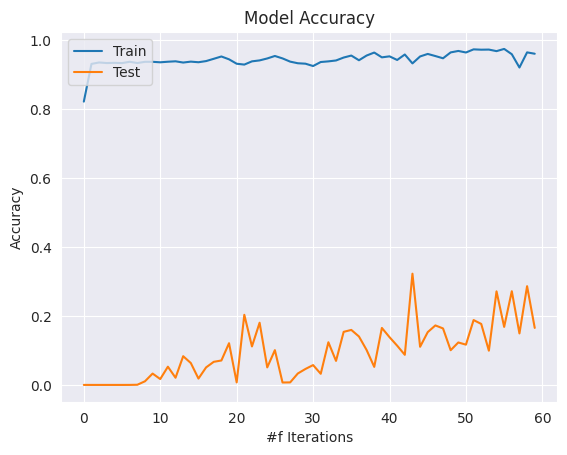

In [144]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check

In [47]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/test_images2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-

In [48]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [49]:
arr_st = np.stack(l)

In [50]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(733, 1250, 12)

In [51]:
x1_v = x.shape[0]%32
x1_h = x.shape[1]%32
res1 = x.shape[0]-x1_v
res2 = x.shape[1]-x1_h
xx = x[0:(x.shape[0]-x1_v),0:(x.shape[1]-x1_h),:]

In [52]:
x = x[0:720,0:1200,:]
x.shape

(720, 1200, 12)

In [53]:
x_r = x.reshape(-1,20,20,12)
x_r.shape

(2160, 20, 20, 12)

In [54]:
x_rr = xx.reshape(-1, 32,32,12)

In [55]:
y_data_test = loadmat('/tmp/shared/test_images2/labeling.mat')['data']
y_data_test.shape

(733, 1250)

In [56]:
y_data_test [y_data_test == 2] = 1
y_data_test [y_data_test == 3] = 1
y_data_test [y_data_test == 4] = 2
y_data_test [y_data_test == 5] = 3


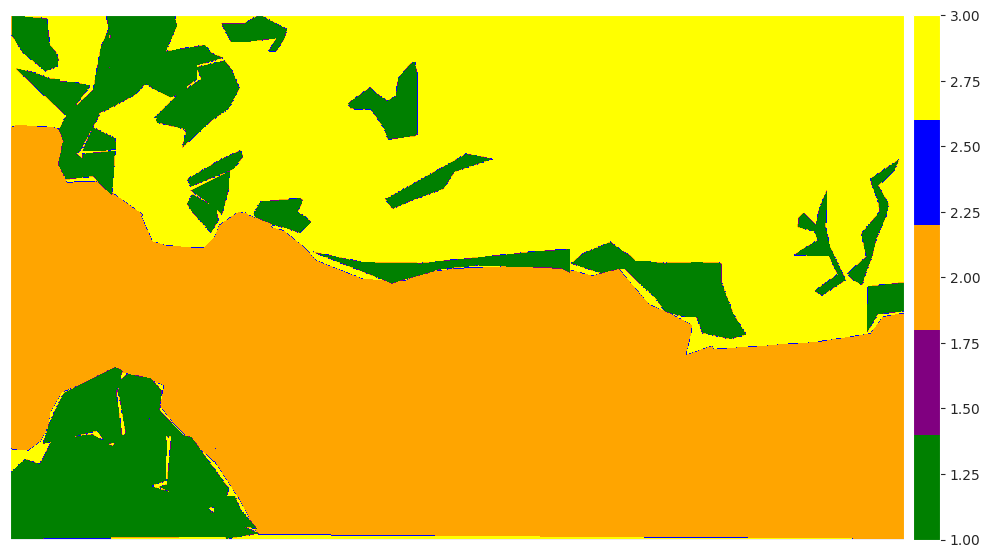

<AxesSubplot:>

In [57]:
ep.plot_bands(y_data_test,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [58]:
x_r_norm =  tf.keras.utils.normalize(x_rr)

In [76]:
x_r_2 = x_rr

In [77]:
x_r_3 = scaler(x_r_2)

In [60]:
std2 = np.std(x_r_2)
mean2 = np.mean(x_r_2)

np.divide(x_r_2, mean2, out=x_r_2, casting="unsafe")
#x_train/=std
np.divide(x_r_2, std2, out=x_r_2, casting="unsafe")

array([[[[ 3.344135 ,  3.5630965,  5.712898 , ..., 19.288494 ,
          10.042359 , 33.132812 ],
         [ 3.2346547,  4.0209246,  6.1408677, ..., 19.52736  ,
          10.599714 , 30.236555 ],
         [ 3.2346547,  4.2996025,  6.170726 , ..., 19.746323 ,
          11.485512 , 28.28581  ],
         ...,
         [ 4.5285163,  5.573559 ,  7.4247766, ..., 20.333536 ,
          14.9689865, 23.88668  ],
         [ 4.4090834,  6.419545 ,  8.489724 , ..., 22.373857 ,
          15.87469  , 26.235535 ],
         [ 4.269744 ,  6.369782 ,  9.066986 , ..., 22.24447  ,
          15.785115 , 28.076803 ]],

        [[ 4.0706882,  8.68878  , 10.569857 , ..., 19.069532 ,
          14.461394 , 26.743128 ],
         [ 3.8417745,  6.170726 ,  7.9821324, ..., 17.23822  ,
          13.028193 , 22.642582 ],
         [ 3.7024357,  6.648459 ,  8.051802 , ..., 17.397465 ,
          12.08268  , 24.732668 ],
         ...,
         [ 4.0209246,  4.5882335,  6.170726 , ..., 20.303679 ,
          12.868949 , 22.

In [61]:
prediction = model.predict(x_r_norm,batch_size=64)

14/14 [==============================] - 2s 35ms/step


In [57]:
prediction.shape

(858, 32, 32, 4)

In [58]:
pred_cat = np.argmax(prediction,axis=3)
pred_cat.shape

(858, 32, 32)

In [59]:
pred_pxl = pred_cat.reshape(res1,res2)

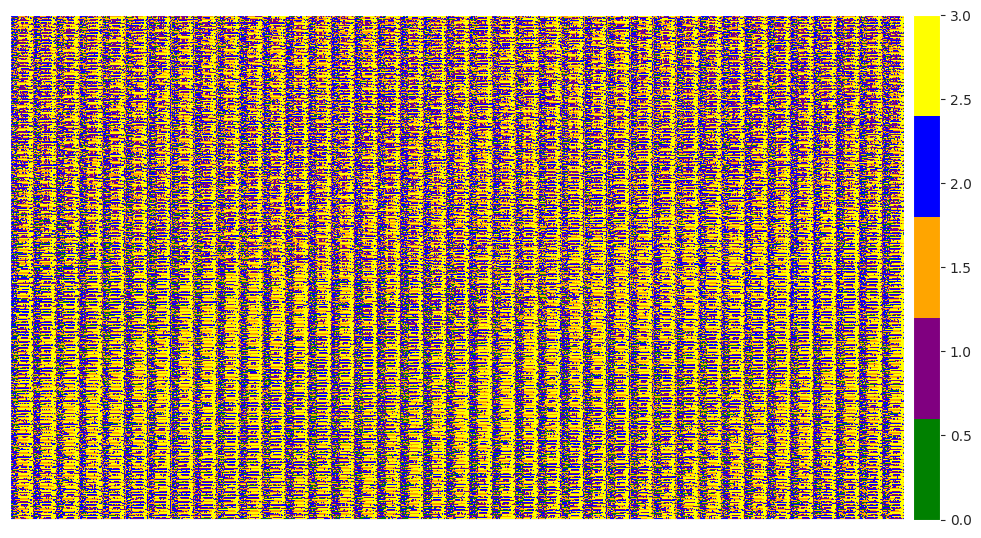

<AxesSubplot:>

In [60]:
ep.plot_bands(pred_pxl,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [61]:
pred_vec = pred_cat.reshape(-1)
pred_vec.shape

(878592,)

In [62]:
y_data_test2 = y_data_test[0:720,0:1200].reshape(-1)
y_data_test2.shape

(864000,)

In [63]:
accuracy_score(y_data_test2, pred_vec)

ValueError: Found input variables with inconsistent numbers of samples: [864000, 878592]

In [ ]:
prediction2 = model_new.predict(x_r_3,batch_size=32)

In [146]:
pred_cat2 = np.argmax(prediction2,axis=3)
pred_cat2.shape

(858, 32, 32)

In [147]:
pred_pxl2 = pred_cat2.reshape(res1, res2)

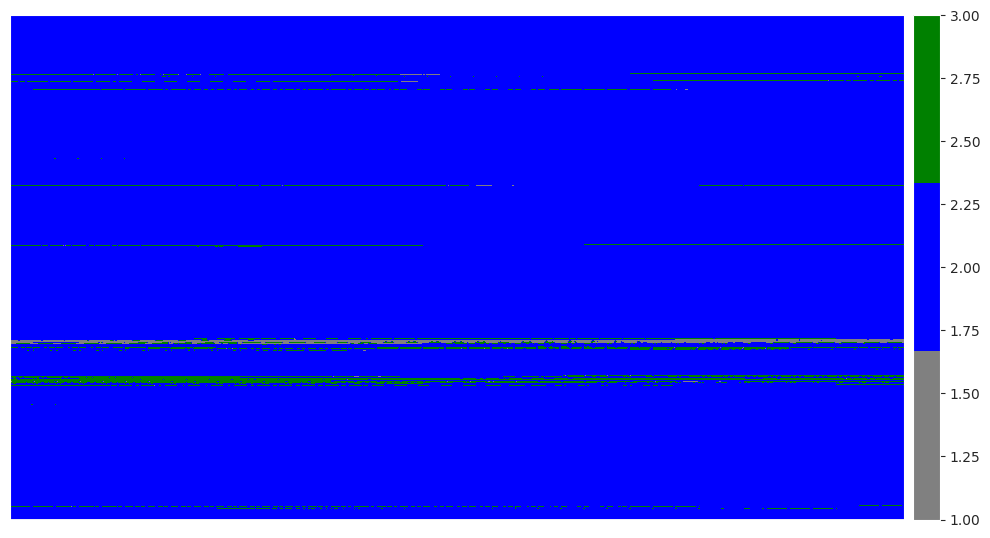

<AxesSubplot:>

In [148]:
ep.plot_bands(pred_pxl2,
              cmap=ListedColormap(['gray', 'blue', 'green']))

In [149]:
pred_vec2 = pred_cat2.reshape(-1)
pred_vec2.shape

(878592,)

In [150]:
y_data_test3 = y_data_test[0:res1,0:res2].reshape(-1)
y_data_test3.shape

(878592,)

In [151]:
accuracy_score(y_data_test3, pred_vec2)

0.43157688665501165